In [56]:
import pandas as pd
import plotly.express as px



In [144]:
# reading the csv file
data = pd.read_csv("population_total.csv")

# dropping null values
data =data.dropna()

#making a pivot table
data_pivot = data.pivot(index="year",columns="country",values="population")

# selecting some countries
data_pivot = data_pivot[['United States','India','China','Indonesia','Brazil']]

# showing pivot table
data_pivot


country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


# LINEPLOT  with the plotly library

####   ⭐ GENERAL SYNTAX OF PLOTLY EXPRESS
px.chart_type(
    data_frame,
    x="column_name_for_x",
    y="column_name_for_y",
    color="column_name_for_colors",
    title="Your Title Here",
    labels={"x": "X Label", "y": "Y Label"},
    other_options_here...
)


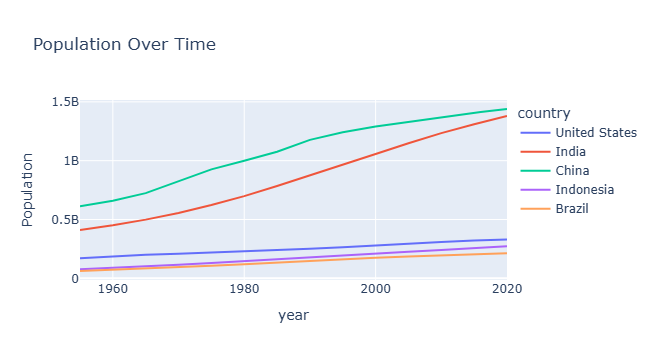

In [68]:
fig = px.line(
    data_pivot,
    x=data_pivot.index,
    y=data_pivot.columns,
    labels={"x": "Year", "value": "Population"},
    title="Population Over Time",
       # width=700,     # figure width in pixels
   # height=400     # figure height in pixels
)
fig.show()


# BARPLOT With plotly

In [130]:
# select only 2020
dd = data_pivot.loc[[2020]].T
dd = dd.reset_index()
dd.columns = ["Country", "Population"]


In [131]:
dd

,Country,Population
0,United States,3.310027e+08
1,India,1.380004e+09
2,China,1.439324e+09
3,Indonesia,2.735236e+08
4,Brazil,2.125594e+08


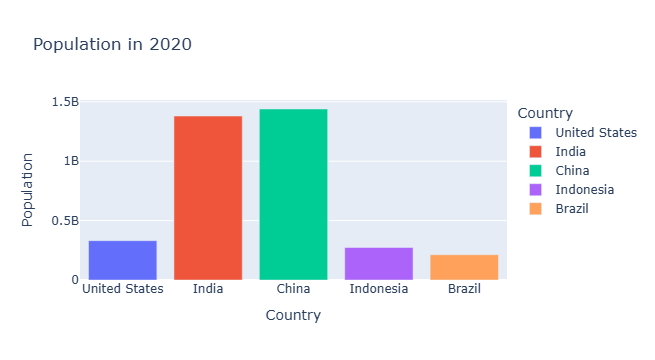

In [129]:
fig = px.bar(
    dd,
    x="Country",
    y="Population",
    title="Population in 2020",
    labels={"x": "Country", "y": "Population"},
      #color_discrete_sequence=["blue"],
    color="Country"
)

fig.show()


# 2.1 Barplot grouped by 'n' variables

In [145]:
data

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [153]:

# selecting a few years
bar = data.query("year in [1980,1990,2000,2010,2020] ")
bar_clean = bar.drop_duplicates()
bar_clean


,country,year,population
0,China,2020.0,1.439324e+09
6,China,2010.0,1.368811e+09
8,China,2000.0,1.290551e+09
10,China,1990.0,1.176884e+09
12,China,1980.0,1.000089e+09
...,...,...,...
4146,Pakistan,1980.0,7.805434e+07
4150,Indonesia,1980.0,1.474478e+08
4160,India,1990.0,8.732778e+08
4162,India,1980.0,6.989528e+08


In [148]:
bar

,country,year,population
0,China,2020.0,1.439324e+09
6,China,2010.0,1.368811e+09
8,China,2000.0,1.290551e+09
10,China,1990.0,1.176884e+09
12,China,1980.0,1.000089e+09
...,...,...,...
4146,Pakistan,1980.0,7.805434e+07
4150,Indonesia,1980.0,1.474478e+08
4160,India,1990.0,8.732778e+08
4162,India,1980.0,6.989528e+08


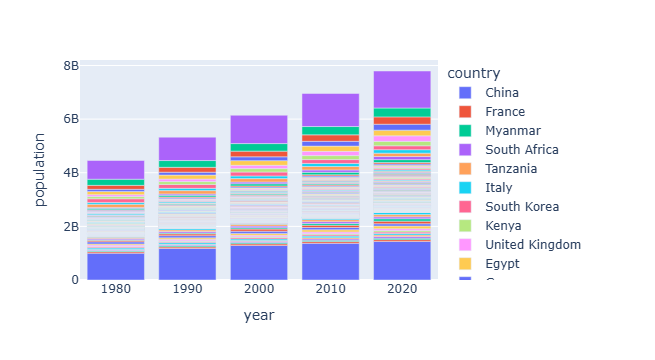

In [157]:
fig = px.bar(bar,
             x= 'year',
             y = 'population',
             labels={'x' : 'year',"y" :"population", "values": "country"},
            color ="country")
fig.show()